In [1]:
from _utils import PhotoScripts as PS
import os, pandas as pd
from astropy import units as u
import config

%load_ext autoreload
%autoreload 2

In [22]:
filters = ['f475w', 'f606w', 'f814w', 'f090w', 'f115w', 'f150w', 'f200w', 'f277w', 'f356w', 'f410m', 'f444w']
code = 'bagpipes'     # 'bagpipes' or 'cigale'

galaxy_name = 'test_new'
lister = [(p.split('_')[1], p.split('_')[0]) for p in os.listdir('Galaxies/{}'. format(galaxy_name)) if p.endswith('sci.fits') and not p.startswith('f444w')]
df_bundle = pd.DataFrame(lister, columns = ['Filter', 'Telescope'])
df_bundle['Wvl'] = [config.band_wvl_association[f] for f in df_bundle['Filter']]
df_bundle = df_bundle.sort_values(by='Wvl').reset_index(drop = True)
df_bundle = df_bundle[df_bundle['Filter'].isin(filters)].reset_index(drop = True)

map_tuple, errormap_tuple = PS.reduce_maps(galaxy_name, df_bundle, kernel_path = '../kernels/Anderson/', error_from_percentage = 0.1, code = code, save_fits = True)

Kernel convolution...
       f475w filter
       f606w filter
       f814w filter
       f090w filter
       f115w filter
       f150w filter
       f200w filter
       f277w filter
       f356w filter
       f410m filter
       f444w filter



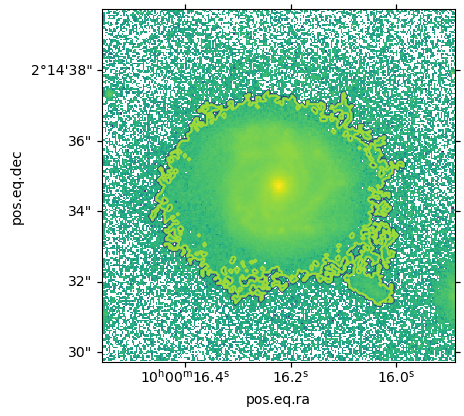

In [23]:
segmap = PS.segmentation_map(map_tuple[2:3], errormap_tuple[2:3], thresh = 15, minarea = 1000, plot_segm = True)

In [32]:
#mask_ra, mask_dec, mask_radius = 150.0930323*u.deg, 2.3851089*u.deg, 2*u.arcsec
#mask_ra, mask_dec, mask_radius = 150.1338355*u.deg, 2.26624291*u.deg, 2.5*u.arcsec
#mask_ra, mask_dec, mask_radius = 150.1540083*u.deg, 2.22618718*u.deg, 2.5*u.arcsec
mask_ra, mask_dec, mask_radius = 150.0675914*u.deg, 2.2429768*u.deg, 2.5*u.arcsec

df = PS.build_photometry(galaxy_name, map_tuple, errormap_tuple, filters, error_from_percentage = 0.1, \
                         is_segmented = True, which_code = code, segmentation_map = segmap, \
                         masking = True, mask_ra = mask_ra, mask_dec = mask_dec, mask_radius = mask_radius)

---
Check plot

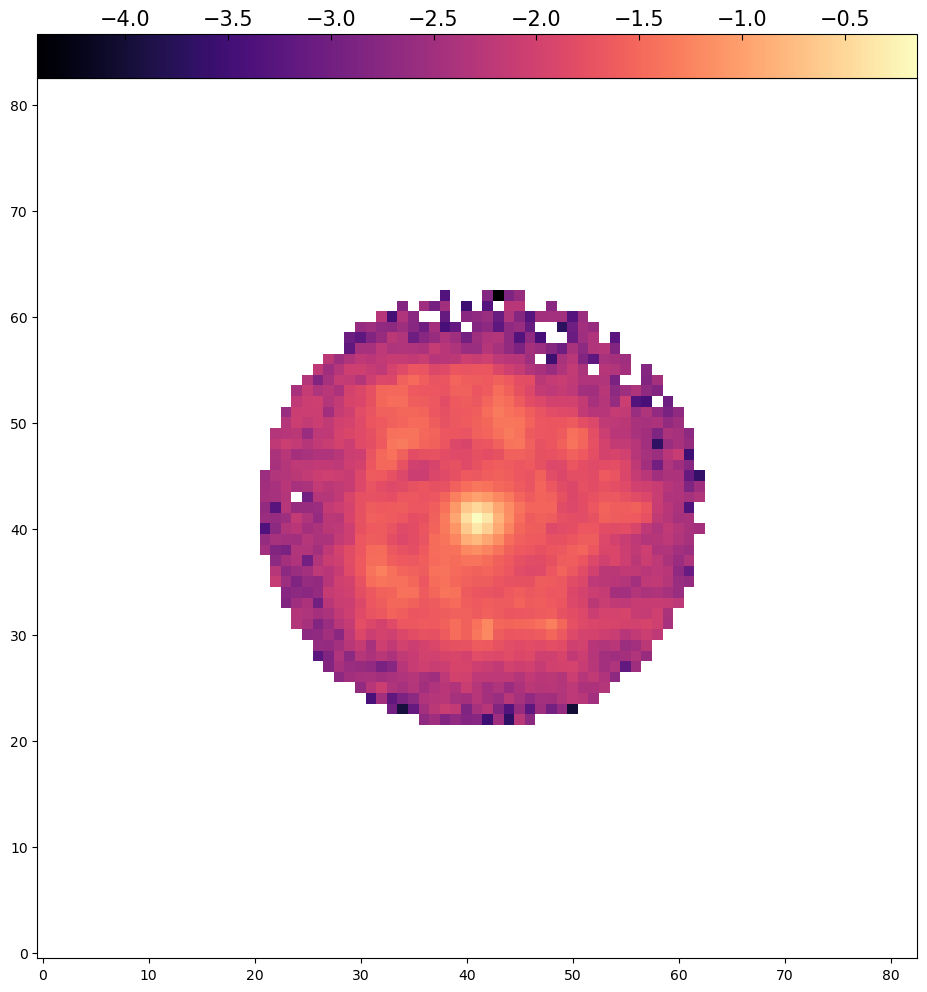

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes
from astropy.io import fits

filter = 'f475w'
temp_hdr = fits.getheader('Galaxies/{0}/{1}_POOLED.fits'.format(galaxy_name, filter))
temp = np.zeros((temp_hdr['NAXIS1'], temp_hdr['NAXIS2']))
temp[temp == 0] = np.nan
temp[df.PIX_Y.astype('int').values, df.PIX_X.astype('int').values] = df[filter]#/df[filter+'_err'])

fig = plt.figure(figsize = (12, 12))
ax = plt.subplot(111)
im = ax.imshow(np.log10(temp), origin = 'lower', cmap = cm.magma, interpolation = 'nearest')
#ax.set_xlim(40, 85), ax.set_ylim(40, 85)
divider = make_axes_locatable(ax)
cax = divider.append_axes("top", size="5%", axes_class=maxes.Axes, pad=0.0)
cax.tick_params(direction='in')
cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
cbar.outline.set_edgecolor('black')
cax.xaxis.set_ticks_position('top')
cax.tick_params(axis='both', which='major', length = 4.0, labelsize=15)

---